In [4]:
# Deteksi Penyakit Diabetes menggunakan KNN, Naïve Bayes, dan Decision Tree

# 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# 2. Load Dataset
df = pd.read_csv("diabetes.csv")  # Pastikan file diabetes.csv sudah diunggah ke Google Colab
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [5]:
# 2. Load Dataset
df = pd.read_csv("diabetes.csv")  # Pastikan file diabetes.csv sudah diunggah ke Google Colab
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=42)
}

In [9]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=42)
}

In [11]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc * 100,
        "Precision": prec * 100,
        "Recall": rec * 100,
        "F1 Score": f1 * 100
    })

    print(f"\nModel: {name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: K-Nearest Neighbors
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154

Confusion Matrix:
 [[80 20]
 [25 29]]

Model: Naive Bayes
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154

Confusion Matrix:
 [[74 26]
 [19 35]]

Model: Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       

In [12]:
results_df = pd.DataFrame(results)
print("\n=== Hasil Evaluasi Model ===")
print(results_df.round(2))


=== Hasil Evaluasi Model ===
                 Model  Accuracy  Precision  Recall  F1 Score
0  K-Nearest Neighbors     70.78      59.18   53.70     56.31
1          Naive Bayes     70.78      57.38   64.81     60.87
2        Decision Tree     70.13      58.33   51.85     54.90


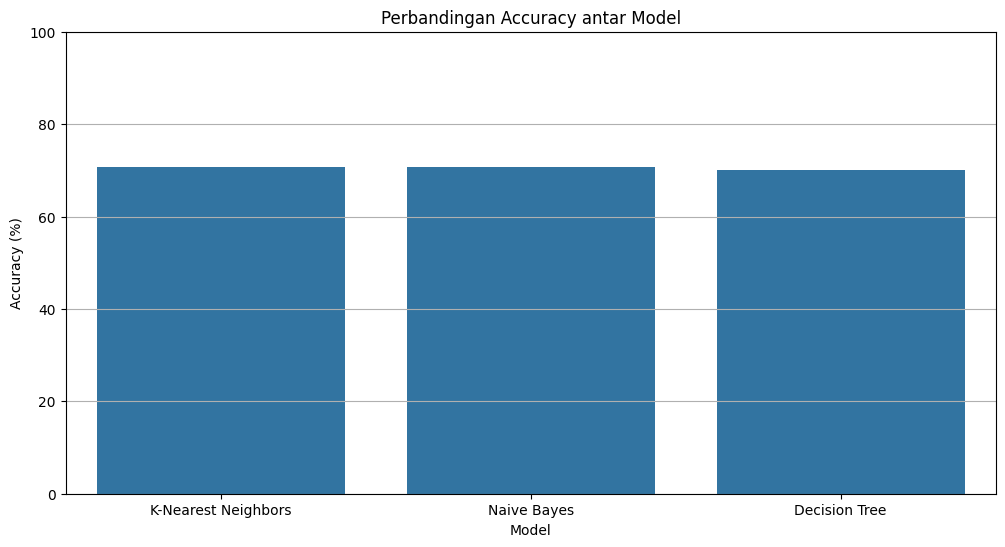

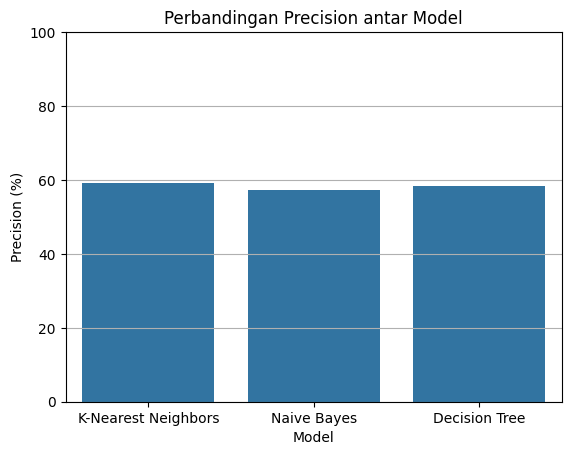

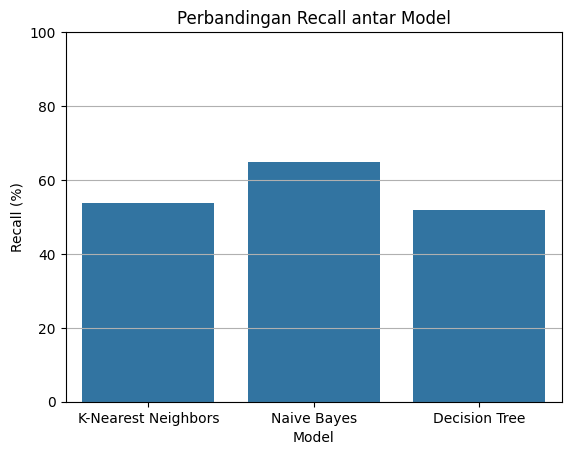

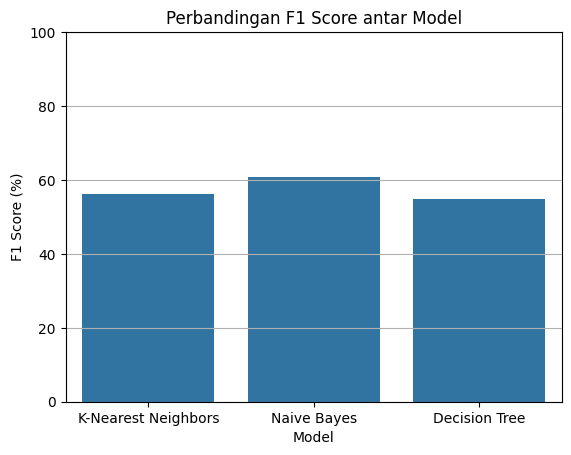

In [13]:
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Perbandingan {metric} antar Model')
    plt.ylabel(f'{metric} (%)')
    plt.ylim(0, 100)
    plt.xlabel('Model')
    plt.grid(axis='y')
    plt.show()